In [209]:
import os
import tarfile
import urllib

In [210]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_PATH = os.path.join("dataset","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

## Here is a function to fetch the data

In [211]:
def fetch_housing_data(housing_url=HOUSING_URL,housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

## fetch the data

In [212]:
fetch_housing_data()

## load the data using pandas. This function returns a pandas dataframe object containing all the data

In [213]:
import pandas as pd

In [214]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)

In [215]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [216]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [217]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [218]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


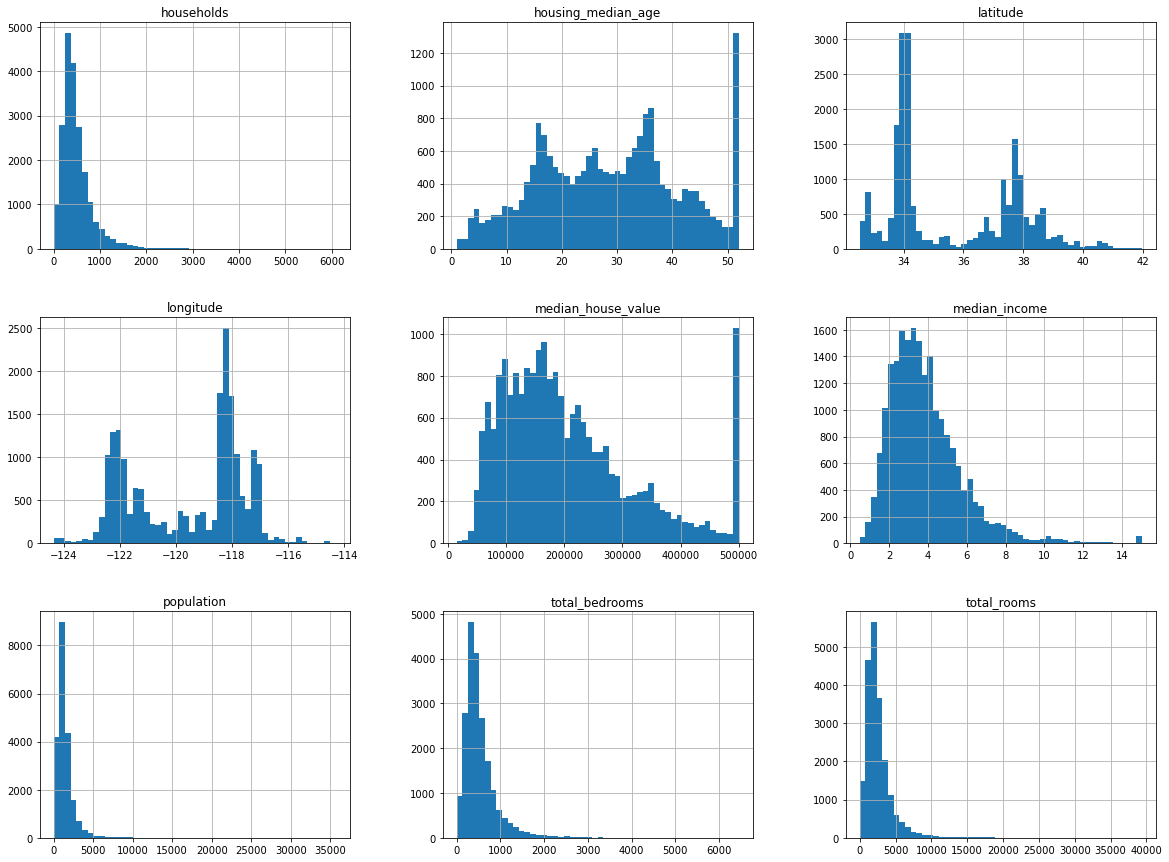

In [219]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [220]:
import numpy as np

In [221]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [222]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=2)
len(train_set)

16512

In [223]:
len(test_set)

4128

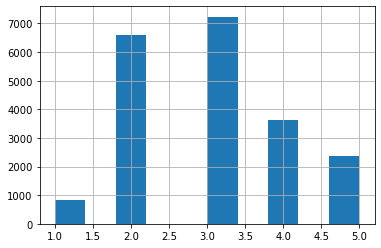

In [224]:
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.0,np.inf], labels = [1,2,3,4,5])
housing["income_cat"].hist()

## Categorize the median income in the housing dataset into 5 categories and use stratified shuffle split

In [225]:
from sklearn.model_selection import StratifiedShuffleSplit

In [226]:
split = StratifiedShuffleSplit(n_splits=1,test_size = 0.2,random_state = 2)
for train_index, test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [227]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [228]:
housing["income_cat"].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [229]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=2)
test_set["income_cat"].value_counts()/len(test_set)

3    0.348353
2    0.312984
4    0.187258
5    0.112645
1    0.038760
Name: income_cat, dtype: float64

### The measure of the median income category proportion in the full data is similar to the strat_test_set data

### Now we remove the income_cat attribute from the housing dataset

In [230]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat',axis=1,inplace = True)

In [231]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17428,-120.47,34.65,16.0,2549.0,428.0,1486.0,432.0,4.2875,150700.0,NEAR OCEAN
16684,-120.59,35.11,25.0,3642.0,726.0,1729.0,673.0,3.1550,205400.0,<1H OCEAN
149,-122.22,37.80,52.0,2721.0,541.0,1185.0,515.0,4.5428,239800.0,NEAR BAY
11930,-117.39,33.93,26.0,3014.0,494.0,1832.0,485.0,4.8333,127900.0,INLAND
20032,-119.03,36.07,26.0,3210.0,646.0,1908.0,642.0,2.4167,77600.0,INLAND


In [232]:
housing = strat_train_set.copy()

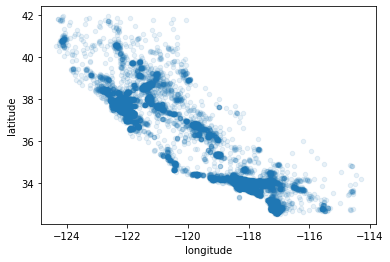

In [233]:
housing.plot(kind="scatter",x='longitude',y = 'latitude',alpha = 0.1)

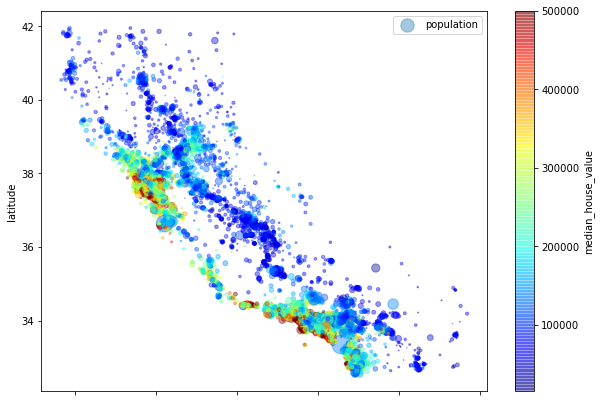

In [234]:
housing.plot(kind='scatter',x='longitude',y = 'latitude',alpha = 0.4,
            s=housing["population"]/100,label="population",figsize=(10,7),c = "median_house_value",
            cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

In [235]:
# correlation of all attributes
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686647
total_rooms           0.140323
housing_median_age    0.098210
households            0.072984
total_bedrooms        0.056057
population           -0.016927
longitude            -0.045144
latitude             -0.145791
Name: median_house_value, dtype: float64

In [236]:
# make a scatter matrix for all attributes

from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2dea348210>,
      dtype=object)

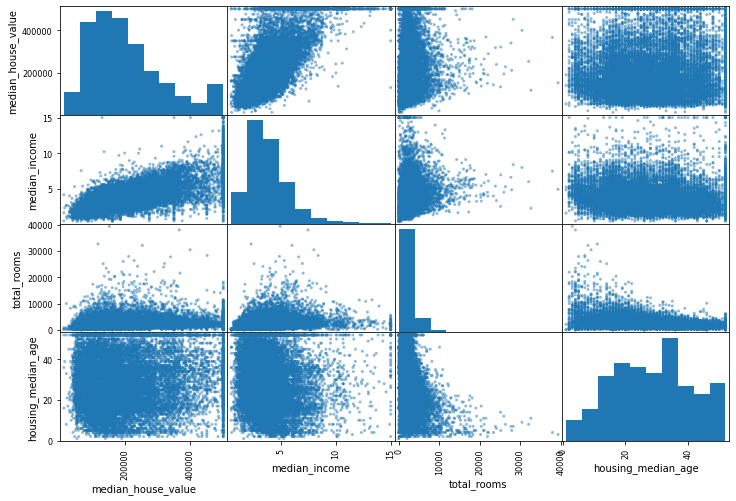

In [237]:
attributes = ["median_house_value",'median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))

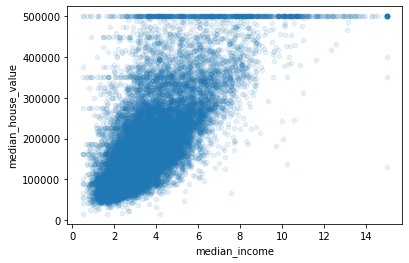

In [238]:
housing.plot(kind="scatter",x='median_income',y = 'median_house_value',alpha = 0.1)

In [239]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [240]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.686647
rooms_per_household         0.145996
total_rooms                 0.140323
housing_median_age          0.098210
households                  0.072984
total_bedrooms              0.056057
population                 -0.016927
population_per_household   -0.019463
longitude                  -0.045144
latitude                   -0.145791
bedrooms_per_room          -0.252843
Name: median_house_value, dtype: float64

In [241]:
# separate the predictors and the target attributes

housing = strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [242]:
# total_bedrooms attributes has some missing values with the median

median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median,inplace=True)

In [243]:
# Another way to fix missing values are with SimpleImputer

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

In [244]:
# Since the median can only be computed on numerical attributes, we need to create a copy of the data without the text attribute "ocean_proximity"

housing_num = housing.drop("ocean_proximity",axis=1)

# you can fit the imputer instance and apply to all numerical attributes

imputer.fit(housing_num)

imputer.statistics_

array([-118.52  ,   34.26  ,   29.    , 2123.    ,  434.    , 1166.    ,
        408.5   ,    3.5377])

In [245]:
housing_num.median().values

array([-118.52  ,   34.26  ,   29.    , 2123.    ,  434.    , 1166.    ,
        408.5   ,    3.5377])

In [246]:
X = imputer.transform(housing_num)

In [247]:
# put back to a pandas dataframe

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = housing_num.index)

In [248]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17428,-120.47,34.65,16.0,2549.0,428.0,1486.0,432.0,4.2875
16684,-120.59,35.11,25.0,3642.0,726.0,1729.0,673.0,3.1550
149,-122.22,37.80,52.0,2721.0,541.0,1185.0,515.0,4.5428
11930,-117.39,33.93,26.0,3014.0,494.0,1832.0,485.0,4.8333
20032,-119.03,36.07,26.0,3210.0,646.0,1908.0,642.0,2.4167


In [249]:
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.00000,16512.000000
mean,-119.582284,35.646826,28.655705,2629.863312,535.389838,1422.138505,497.28876,3.867447
std,2.005874,2.139833,12.594388,2186.207997,418.305961,1139.331967,380.87810,1.890126
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.00000,0.499900
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,279.00000,2.562500
50%,-118.520000,34.260000,29.000000,2123.000000,434.000000,1166.000000,408.50000,3.537700
75%,-118.020000,37.720000,37.000000,3135.250000,642.000000,1715.250000,602.00000,4.744700
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.00000,15.000100


### Handling Text and categorical attributes

In [250]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17428,NEAR OCEAN
16684,<1H OCEAN
149,NEAR BAY
11930,INLAND
20032,INLAND
12723,INLAND
5133,<1H OCEAN
17795,<1H OCEAN
3121,INLAND
12472,INLAND


In [251]:
housing_cat['ocean_proximity'].value_counts()

<1H OCEAN     7332
INLAND        5250
NEAR OCEAN    2102
NEAR BAY      1824
ISLAND           4
Name: ocean_proximity, dtype: int64

In [252]:
# we can convert this attributes' categories from text to numbers using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[4.],
       [0.],
       [3.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [253]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [254]:
# we can convert this attributes' categories from text to numbers using OneHotEncoder

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [255]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [256]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [257]:
# A new class that helps to add new attributes

from sklearn.base import BaseEstimator,TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or *kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self,X,y=None):
        return self # nothing else to do
    
    def transform(self,X):
        rooms_per_households = X[:,rooms_ix]/X[:,households_ix]
        population_per_households = X[:,population_ix]/X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_households,population_per_households,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_households,population_per_households]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attr = attr_adder.transform(housing.values)

## Feature scaling

In [258]:
# tranformation pipelines

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')), ('attribs_adder',CombinedAttributesAdder()),
                        ('std_scaler',StandardScaler())])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [259]:
# Use the ColumnTransformer to perform appropriate transformation to every column

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribs), ('cat',OneHotEncoder(),cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

### Training and Evaluating on the training set

In [260]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [261]:
# test the model

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("predictions:",lin_reg.predict(some_data_prepared))

predictions: [258100.81765463 236003.31514315 290621.17939204 176797.83827513
  90931.3261912 ]


In [262]:
print("Labels:",list(some_labels))

Labels: [150700.0, 205400.0, 239800.0, 127900.0, 77600.0]


In [263]:
from sklearn.metrics import mean_squared_error
housing_predict = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68265.90542805477

### Train a DecisionTreeRegressor

In [264]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [265]:
housing_predict = tree_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

In [277]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring = 'neg_mean_squared_error',cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [278]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())
    
display_scores(tree_rmse_scores)

Scores: [70949.16572781 73742.06697628 65703.73165785 70637.46201905
 75646.61924821 70644.99399834 75519.81950068 69320.15279007
 72163.3109812  70260.13018124]
Mean: 71458.7453080729
Standard deviation: 2836.6774480504027


In [279]:
# try the cross valuation on linear Regression

lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring = 'neg_mean_squared_error',cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [63943.4603632  68131.1023668  66653.50861485 66412.49035692
 71651.43535297 69276.30004985 73787.69941603 66801.10364664
 71355.67746695 68542.3910222 ]
Mean: 68655.516865642
Standard deviation: 2792.1390043289066


In [280]:
# Try RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

housing_predict = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels,housing_predict)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18729.33916307807

In [281]:
scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring = 'neg_mean_squared_error',cv=10)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

Scores: [48185.81789204 50387.9400005  47743.60584638 49186.44652673
 52701.83045603 49977.42534652 54018.11759833 49185.98953143
 52100.89273341 49807.4449622 ]
Mean: 50329.55108935769
Standard deviation: 1914.8891877906997


In [285]:
# save models using joblib
import joblib
joblib.dump(forest_reg,"my_model.pkl")

['my_model.pkl']

## Fine-Tune your model

In [290]:
# Grid search
from sklearn.model_selection import GridSearchCV

para_grid = [
    {'n_estimators':[3, 10, 30],'max_features': [2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg,para_grid,cv=10,scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [291]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [292]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [293]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

63047.25426285588 {'max_features': 2, 'n_estimators': 3}
55129.55669666424 {'max_features': 2, 'n_estimators': 10}
52353.97282364267 {'max_features': 2, 'n_estimators': 30}
60370.616820235846 {'max_features': 4, 'n_estimators': 3}
52503.00444108931 {'max_features': 4, 'n_estimators': 10}
49853.24712769694 {'max_features': 4, 'n_estimators': 30}
58781.83994539755 {'max_features': 6, 'n_estimators': 3}
51775.83491316363 {'max_features': 6, 'n_estimators': 10}
49500.72279627696 {'max_features': 6, 'n_estimators': 30}
58649.80624375322 {'max_features': 8, 'n_estimators': 3}
51608.147197458966 {'max_features': 8, 'n_estimators': 10}
49704.205404677756 {'max_features': 8, 'n_estimators': 30}
62329.73063231279 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53571.61252313497 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59383.03805116437 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52201.88565214163 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [294]:
# Try RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(forest_reg,para_grid,n_iter=1000,scoring='neg_mean_squared_error',return_train_score=True)
random_search.fit(housing_prepared, housing_labels)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 18 is smaller than n_iter=1000. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=1000,
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [295]:
random_search.best_params_

{'n_estimators': 30, 'max_features': 6}

In [296]:
cvres = random_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

63344.17646474845 {'n_estimators': 3, 'max_features': 2}
55738.82609388184 {'n_estimators': 10, 'max_features': 2}
52539.49127807521 {'n_estimators': 30, 'max_features': 2}
60025.11900802236 {'n_estimators': 3, 'max_features': 4}
52966.252479027906 {'n_estimators': 10, 'max_features': 4}
50595.175007026955 {'n_estimators': 30, 'max_features': 4}
59117.46701117369 {'n_estimators': 3, 'max_features': 6}
52484.38266535508 {'n_estimators': 10, 'max_features': 6}
50161.63570401413 {'n_estimators': 30, 'max_features': 6}
58371.487352787226 {'n_estimators': 3, 'max_features': 8}
52680.83212381848 {'n_estimators': 10, 'max_features': 8}
50170.08436370987 {'n_estimators': 30, 'max_features': 8}
62620.747507441156 {'n_estimators': 3, 'max_features': 2, 'bootstrap': False}
54284.39566135763 {'n_estimators': 10, 'max_features': 2, 'bootstrap': False}
60525.001007768835 {'n_estimators': 3, 'max_features': 3, 'bootstrap': False}
52268.413193483124 {'n_estimators': 10, 'max_features': 3, 'bootstrap':

In [297]:
# Analyze the best models and their errors

feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([7.02988353e-02, 6.52914778e-02, 4.46770225e-02, 1.81346461e-02,
       1.69384893e-02, 1.78488932e-02, 1.69380207e-02, 3.64253258e-01,
       4.15239909e-02, 1.04495676e-01, 8.21438960e-02, 6.57106225e-03,
       1.41993236e-01, 1.33610202e-04, 3.65147905e-03, 5.10640752e-03])

In [300]:
# display importance scores next to their corresponding attribute names

extra_attribs = ["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance,attributes),reverse = True)

[(0.36425325765106137, 'median_income'),
 (0.1419932358199862, 'INLAND'),
 (0.10449567574790099, 'pop_per_hhold'),
 (0.08214389595135074, 'bedrooms_per_room'),
 (0.07029883532105187, 'longitude'),
 (0.06529147775753981, 'latitude'),
 (0.044677022527519296, 'housing_median_age'),
 (0.041523990903442776, 'rooms_per_hhold'),
 (0.018134646093152077, 'total_rooms'),
 (0.017848893175702693, 'population'),
 (0.016938489311369206, 'total_bedrooms'),
 (0.01693802072507608, 'households'),
 (0.006571062246051029, '<1H OCEAN'),
 (0.005106407520632314, 'NEAR OCEAN'),
 (0.0036514790461589946, 'NEAR BAY'),
 (0.00013361020200461694, 'ISLAND')]

### Evaluate your system on the test set

In [301]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

In [303]:
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48900.24009391476

In [304]:
from scipy import stats
confidence = 0.95

squared_errors = (final_predictions-y_test)**2

np.sqrt(stats.t.interval(confidence,len(squared_errors)-1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([46800.80388958, 50913.17823289])